In [1]:
__author__ = "@Tssp"
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from ipywidgets import interactive
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

# $$E_{\pm}(t)=\bar{E}^2 \pm \frac{1}{2}\sqrt{\Delta^2 + 4|W|^2}$$
# for: $$E_1(t) = \frac{1}{2}\alpha t$$
# $$E_2(t) = -\frac{1}{2}\alpha t$$
# $$E_{\pm}(t)=\pm \frac{1}{2}\sqrt{\alpha^2t^2 + 4|W|^2}$$

In [2]:
W = 1
Delta = np.linspace(-10, 10)

In [3]:
def Energies(W, Delta):
    adiabatic = 1/2*np.sqrt(Delta**2 + 4*W**2)
    diabatic = 1/2*Delta
    return adiabatic, -adiabatic, diabatic, -diabatic

In [4]:
E_p, E_m, Ed_p, Ed_m = Energies(W, Delta)

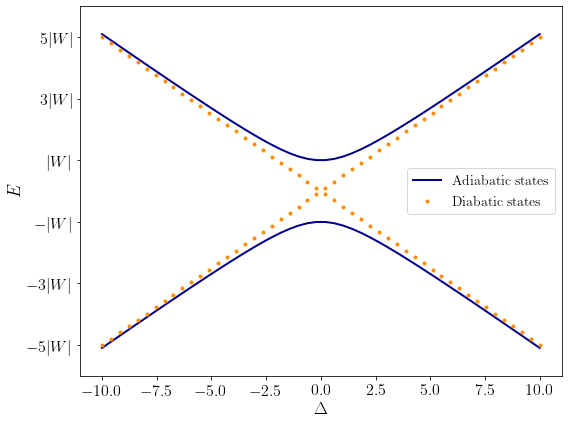

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
ax.plot(Delta, E_m, 'darkblue', lw=2)
ax.plot(Delta, Ed_p, 'darkorange', lw=2, label='Diabatic states')
ax.plot(Delta, Ed_m, 'darkorange', lw=2)
ax.set_xlabel('$\Delta$')
ax.set_ylabel('$E$')
plt.legend(fontsize=14, loc='best')
plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
ax.set_ylim(-6, 6)
#ax.set_xlim(-20, 20)
plt.tight_layout()
fig.savefig('General_figures/Landau_Zener.png', dpi=200)

In [6]:
def plotting(W=1):
    E_p, E_m, Ed_p, Ed_m = Energies(W, Delta)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(Delta, Ed_p, 'red', lw=2, label='Diabatic states')
    ax.plot(Delta, Ed_m, 'red', lw=2)
    ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
    ax.plot(Delta, E_m, 'darkblue', lw=2)
    ax.set_xlabel('$\Delta$')
    ax.set_ylabel('$E$')
    plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
    plt.legend(fontsize=14, loc='best')
    ax.set_ylim(-6, 6)
    #ax.set_xlim(-20, 20)

In [63]:
interactive_plot = interactive(plotting, W=(0, 5, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='W', max=5.0, step=0.5), Output()), _dom_classes=('wi…

## Animation

In [7]:
import matplotlib.animation as animation

In [8]:
def init():
    ax.plot(Delta, E_p, 'darkblue', lw=2, label='Adiabatic states')
    ax.plot(Delta, E_m, 'darkblue', lw=2)
    ax.set_xlabel('$\Delta$')
    ax.set_ylabel('$E$')
    ax.text(-0.1, 1.7, r'$\left| \Psi_1 \right>$', fontsize=16, color='darkblue')
    ax.text(-0.1, -1.7, r'$\left| \Psi_2 \right>$', fontsize=16, color='darkblue')
    plt.yticks(ticks=range(-5, 6, 2), labels=['$-5|W|$', '$-3|W|$', '$-|W|$', '$|W|$', '$3|W|$', '$5|W|$'])
    ax.set_ylim(-6, 6)
    plt.grid()
    plt.tight_layout()
    return ln,

In [9]:
def update(frame):
    xdata.append(frame)
    E_p, E_m, Ed_p, Ed_m = Energies(W, frame)
    ydata.append(Ed_p)
    ydata2.append(Ed_m)
    ln.set_data(frame, Ed_p)
    ln2.set_data(frame, Ed_m)
    ln3.set_data(xdata, ydata)
    ln4.set_data(xdata, ydata2)
    return ln,

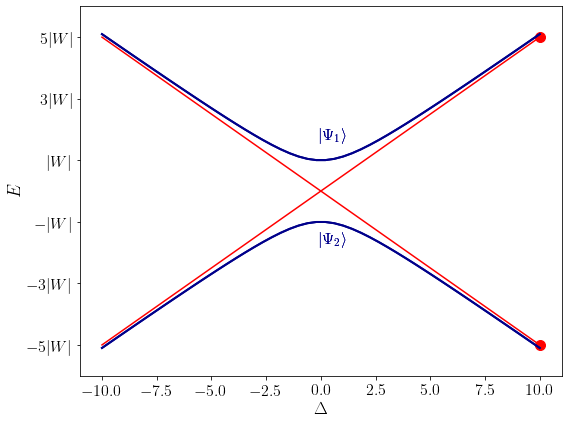

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
xdata, ydata, ydata2 = [], [], []
ln, = plt.plot([], [], '.', color='red', markersize=20)
ln2, = plt.plot([], [], '.', color='red', markersize=20)
ln3, = plt.plot([], [], '..', color='red', markersize=20)
ln4, = plt.plot([], [], '..', color='red', markersize=20)

ani = animation.FuncAnimation(fig, update, frames=np.linspace(-10, 10, 150),
                    init_func=init, blit=True, interval = 20)

ani.save(f'General_figures/NonAdiabatic_Transition.gif', writer='pillow', dpi=200)
plt.show()

In [68]:
def update(frame):
    xdata.append(frame)
    E_p, E_m, Ed_p, Ed_m = Energies(W, frame)
    ydata.append(E_p)
    ydata2.append(E_m)
    ln.set_data(frame, E_p)
    ln2.set_data(frame, E_m)
    return ln,

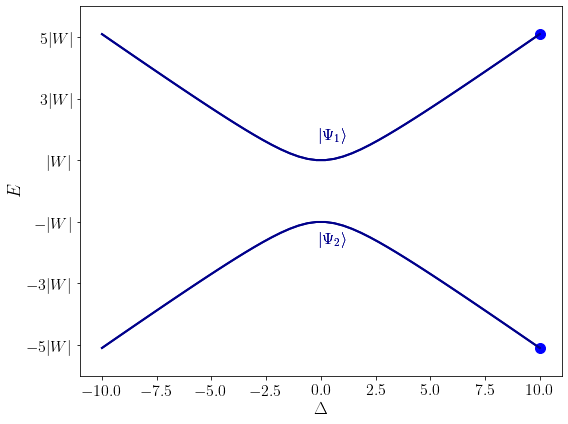

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
xdata, ydata, ydata2 = [], [], []
ln, = plt.plot([], [], '.', color='b', markersize=20)
ln2, = plt.plot([], [], '.', color='b', markersize=20)

ani = animation.FuncAnimation(fig, update, frames=np.linspace(-10, 10, 150),
                    init_func=init, blit=True, interval = 50)

ani.save(f'General_figures/Adiabatic_Transition.gif', writer='pillow', dpi=200)
plt.show()